In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
import joblib
from sklearn.metrics import confusion_matrix
import sklearn

In [2]:
df=pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)


Total number of rows with missing values is  242


In [6]:
df["rbc"].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [7]:
df["rbc"].fillna("normal", inplace=True)


In [8]:
df["pc"].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [9]:
df["pc"].fillna("normal", inplace=True)

In [10]:
df["pcc"].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [11]:
df["pcc"].fillna("notpresent", inplace=True)

In [12]:
df["ba"].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [13]:
df["ba"].fillna("notpresent", inplace=True)

In [14]:
df["htn"].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [15]:
df["htn"].fillna("no", inplace=True)

In [16]:
df["dm"].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [17]:
df["dm"].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [18]:
df["dm"].fillna("no", inplace=True)

In [19]:
df["cad"].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [20]:
df["cad"].fillna("no", inplace=True)

In [21]:
df["appet"].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [22]:
df["appet"].fillna("good", inplace=True)

In [23]:
df["pe"].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [24]:
df["pe"].fillna("no", inplace=True)

In [25]:
df["ane"].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [26]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [27]:
df["classification"].fillna("ckd", inplace=True)


In [28]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


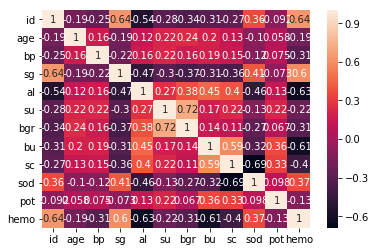

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
   
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1,'no':0 ,'':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0,'no':0})

In [31]:
df["rbc"]=df["rbc"].astype("category").cat.codes
df["pc"]=df["pc"].astype("category").cat.codes
df["pcc"]=df["pcc"].astype("category").cat.codes
df["ba"]=df["ba"].astype("category").cat.codes
df["htn"]=df["htn"].astype("category").cat.codes
df["dm"]=df["dm"].astype("category").cat.codes
df["cad"]=df["cad"].astype("category").cat.codes
df["appet"]=df["appet"].astype("category").cat.codes
df["pe"]=df["pe"].astype("category").cat.codes
df["ane"]=df["ane"].astype("category").cat.codes

In [32]:
df["pcv"]=pd.to_numeric(df['pcv'],errors='coerce')
df["rc"]=pd.to_numeric(df['pcv'],errors='coerce')
df["wc"]=pd.to_numeric(df['wc'],errors='coerce')

In [33]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                 71
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [34]:
df1=df.fillna(df.mean())

In [35]:
df1.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D858C68D0>,
      dtype=object)

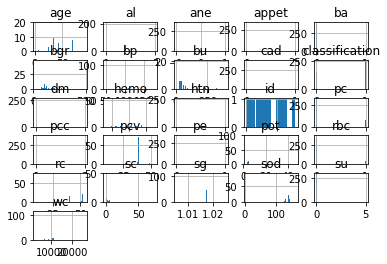

In [36]:
df1.hist(bins=500)

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)

In [38]:
test


SelectKBest(k=4, score_func=<function chi2 at 0x0000023D8FF58488>)

In [37]:
df.corr() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.231457,-0.335825,-0.264142,-0.115955,...,0.630019,-0.198641,0.630019,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.275345,-0.838528
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.012144,0.103273,0.159290,0.043602,...,-0.242119,0.118339,-0.242119,0.398944,0.368244,0.233201,-0.158928,0.095658,0.041271,0.227268
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.153098,0.159032,0.059668,0.112274,...,-0.326319,0.029753,-0.326319,0.273652,0.231295,0.086743,-0.179118,0.055414,0.204279,0.294077
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.238350,-0.352543,-0.292960,-0.221653,...,0.603560,-0.236215,0.603560,-0.402756,-0.433308,-0.175937,0.268958,-0.299036,-0.243082,-0.732163
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.377205,0.543504,0.402831,0.369254,...,-0.611891,0.231989,-0.611891,0.527158,0.415250,0.269035,-0.358095,0.477744,0.322958,0.627090
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.075024,0.172487,0.152700,0.108124,...,-0.239189,0.184893,-0.239189,0.322959,0.524013,0.280445,-0.087941,0.143550,0.077908,0.344070
rbc,-0.231457,0.012144,0.153098,-0.238350,0.377205,0.075024,1.000000,0.377394,0.102948,0.184402,...,-0.312109,0.002738,-0.312109,0.140538,0.145646,0.111493,-0.160868,0.199285,0.108805,0.282642
pc,-0.335825,0.103273,0.159032,-0.352543,0.543504,0.172487,0.377394,1.000000,0.520118,0.330401,...,-0.460166,0.126592,-0.460166,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260662,0.375154
pcc,-0.264142,0.159290,0.059668,-0.292960,0.402831,0.152700,0.102948,0.520118,1.000000,0.275082,...,-0.314809,0.190306,-0.314809,0.195623,0.165236,0.188029,-0.189688,0.104356,0.176034,0.265313
ba,-0.115955,0.043602,0.112274,-0.221653,0.369254,0.108124,0.184402,0.330401,0.275082,1.000000,...,-0.209824,0.117970,-0.209824,0.089046,0.080070,0.162395,-0.149126,0.134732,0.053224,0.186871


In [38]:
X=df1[["age","bp","al","pcc","bgr","bu","sc","hemo","pcv","htn","dm","appet"]]
X

,age,bp,al,pcc,bgr,bu,sc,hemo,pcv,htn,dm,appet
0,48.0,80.000000,1.000000,0,121.000000,36.000000,1.200000,15.400000,44.000000,1,1,1
1,7.0,50.000000,4.000000,0,148.036517,18.000000,0.800000,11.300000,38.000000,0,0,1
2,62.0,80.000000,2.000000,0,423.000000,53.000000,1.800000,9.600000,31.000000,0,1,0
3,48.0,70.000000,4.000000,1,117.000000,56.000000,3.800000,11.200000,32.000000,1,0,0
4,51.0,80.000000,2.000000,0,106.000000,26.000000,1.400000,11.600000,35.000000,0,0,1
5,60.0,90.000000,3.000000,0,74.000000,25.000000,1.100000,12.200000,39.000000,1,1,1
6,68.0,70.000000,0.000000,0,100.000000,54.000000,24.000000,12.400000,36.000000,0,0,1
7,24.0,76.469072,2.000000,0,410.000000,31.000000,1.100000,12.400000,44.000000,0,1,1
8,52.0,100.000000,3.000000,1,138.000000,60.000000,1.900000,10.800000,33.000000,1,1,1
9,53.0,90.000000,2.000000,1,70.000000,107.000000,7.200000,9.500000,29.000000,1,1,0


In [39]:
y=df1['classification']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=50)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [43]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC()
logit = LogisticRegression()
ran=RandomForestClassifier()
xgb= XGBClassifier()


In [44]:
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.96875

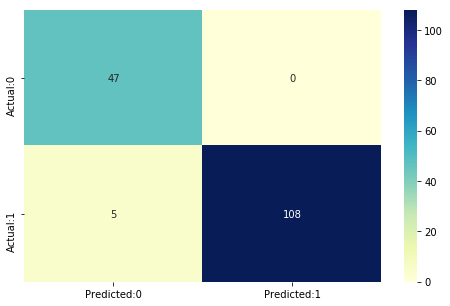

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [46]:
# Fit the model
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9375

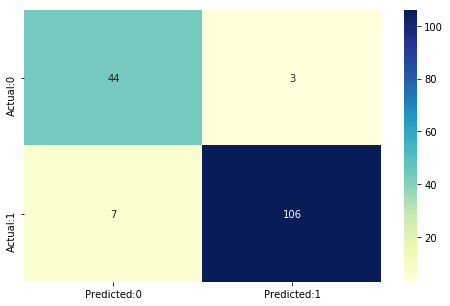

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [48]:
# Fit the model
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9375

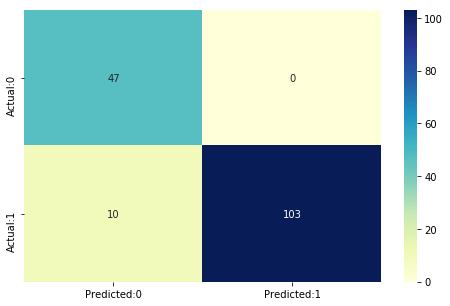

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [50]:
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.95625

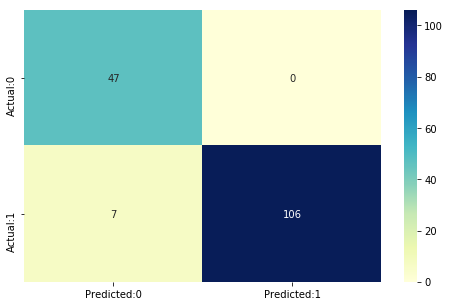

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [52]:
ran.fit(x_train, y_train)
y_pred=ran.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9875

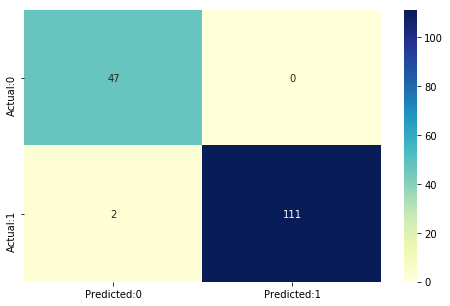

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [54]:
joblib.dump(ran,'model3')

['model3']

In [41]:
from sklearn.ensemble import RandomForestClassifier
lm=RandomForestClassifier()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
print(predictions)

[0 2 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
print(np.array(y_test.values.flatten().tolist()))
print(predictions)

[0 2 0 2 0 2 0 0 2 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]
[0 2 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]


In [43]:
pd.crosstab(np.array(y_test.values.flatten().tolist()),predictions,rownames=['True'],colnames=['predicted'],margins=True)

predicted,0,2,All
True,,,
0,111,1,112
1,1,0,1
2,0,47,47
All,112,48,160


In [46]:
from sklearn import metrics
print("model source:",lm.score(X_test,y_test))#236/208

model source: 0.9875


In [47]:
#logisticregression classifier

In [48]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
print(predictions)

[0 2 0 2 2 2 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0 2 0 2 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
pd.crosstab(np.array(y_test.values.flatten().tolist()),predictions,rownames=['True'],colnames=['predicted'],margins=True)

predicted,0,2,All
True,,,
0,108,4,112
1,1,0,1
2,5,42,47
All,114,46,160


In [50]:
from sklearn import metrics
print("model source:",lm.score(X_test,y_test))#236/208

model source: 0.9375


In [51]:
#decision tree classifier


In [52]:
from sklearn.tree import DecisionTreeClassifier
lm=DecisionTreeClassifier()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
print(predictions)

[0 2 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 1 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 0 0
 0 0 0 0 2 0 0 0 2 0 0 0]


In [53]:
from sklearn import metrics
print("model source:",lm.score(X_test,y_test))#236/208

model source: 0.95


In [54]:
#knn